## 1. Carregando Dados de: /kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv
Dados carregados com sucesso.
Shape inicial: (5293, 399)

## 2. Selecionando Colunas Relevantes

Mantendo 39 colunas existentes de 39 solicitadas.
Shape após seleção de colunas: (5293, 39)

## 3. Removendo Linhas com Dados Ausentes
Removendo linhas que contêm QUALQUER valor NaN nas colunas selecionadas.
Foram removidas 1662 linhas devido a dados ausentes.
Shape após remoção de NaNs: (3631, 39)

## 4. Tratando Outliers na Faixa Salarial
Coluna alvo: '('P2_h ', 'Faixa salarial')'
Convertendo faixas salariais para valores numéricos (ponto médio)...

### Boxplot do Salário Numérico (Ponto Médio) ANTES da remoção de outliers:


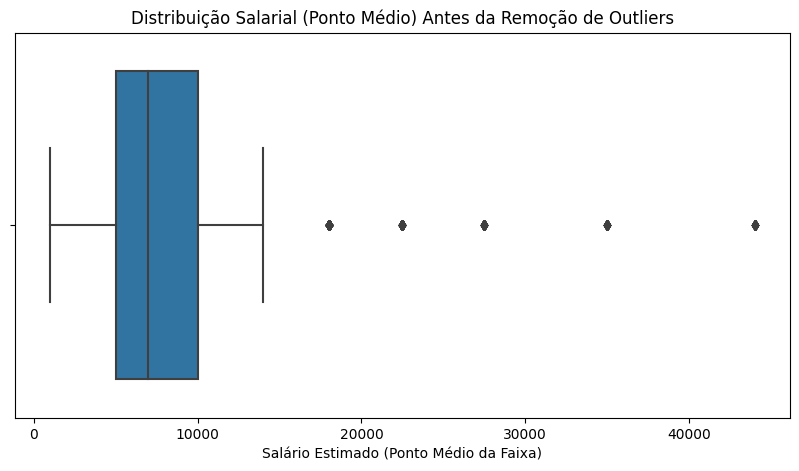


Detalhes do cálculo do IQR para Salário Numérico:
  Q1: 5000.50
  Q3: 10000.50
  IQR: 5000.00
  Limite Inferior (Q1 - 1.5*IQR): -2499.50
  Limite Superior (Q3 + 1.5*IQR): 17500.50

Foram removidas 308 linhas identificadas como outliers salariais.
Shape após tratamento de outliers salariais: (3323, 40)
Coluna 'salario_numerico' temporária removida.

### Boxplot do Salário Numérico (Ponto Médio) APÓS a remoção de outliers:


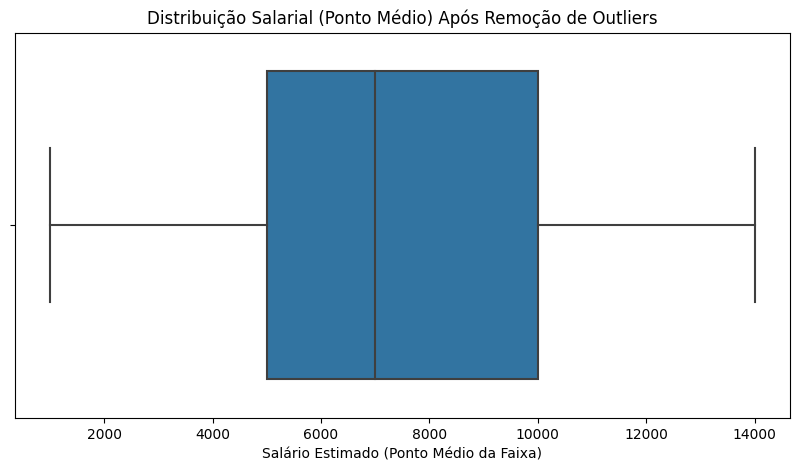


## 5. Limpeza de Dados Concluída
Shape inicial original: (5293, 399)
Shape final do dataset limpo: (3323, 39)
Total de linhas removidas: 1970

### Primeiras 5 linhas do dataset LIMPO:
  ('P1_l ', 'Nivel de Ensino')                      ('P0', 'id')                      ('P1_m ', 'Área de Formação')       ('P2_h ', 'Faixa salarial') ('P2_i ', 'Quanto tempo de experiência na área de dados você tem?') ('P2_g ', 'Nivel') ('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')  ('P4_d_1 ', 'SQL')  ('P4_d_2 ', 'R ')  ('P4_d_3 ', 'Python')  ('P4_d_4 ', 'C/C++/C#')  ('P4_d_5 ', '.NET')  ('P4_d_6 ', 'Java')  ('P4_d_7 ', 'Julia')  ('P4_d_8 ', 'SAS/Stata')  ('P4_d_9 ', 'Visual Basic/VBA')  ('P4_d_10 ', 'Scala')  ('P4_d_11 ', 'Matlab')  ('P4_d_12 ', 'Rust')  ('P4_d_13 ', 'PHP')  ('P4_d_14 ', 'JavaScript')  ('P4_d_15 ', 'Não utilizo nenhuma linguagem') ('P1_b ', 'Genero') ('P1_c ', 'Cor/raca/etnia')              ('P2_b ', 'Setor') ('P1_i_1 ', 'uf onde mora')                    

In [1]:
import pandas as pd
import numpy as np
import re # Import regular expressions for parsing salary
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# --- Configurações ---
# Ignorar avisos de RuntimeWarning que podem aparecer com NaNs em comparações
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered")

# Definir opções de display do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# --- CAMINHOS DOS ARQUIVOS ---
file_path = '/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv'
# Arquivo de saída (será salvo em /kaggle/working/)
output_file_path = '/kaggle/working/State_of_data_BR_2023_cleaned_v2.csv'

# --- COLUNAS A SEREM MANTIDAS (EXATAMENTE COMO NO CABEÇALHO) ---
colunas_para_manter = [
    "('P1_l ', 'Nivel de Ensino')",
    "('P0', 'id')",
    "('P1_m ', 'Área de Formação')",
    "('P2_h ', 'Faixa salarial')", # Coluna para tratar outliers
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
    "('P2_g ', 'Nivel')",
    "('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')",
    "('P4_d_1 ', 'SQL')",
    "('P4_d_2 ', 'R ')",
    "('P4_d_3 ', 'Python')",
    "('P4_d_4 ', 'C/C++/C#')",
    "('P4_d_5 ', '.NET')",
    "('P4_d_6 ', 'Java')",
    "('P4_d_7 ', 'Julia')",
    "('P4_d_8 ', 'SAS/Stata')",
    "('P4_d_9 ', 'Visual Basic/VBA')",
    "('P4_d_10 ', 'Scala')",
    "('P4_d_11 ', 'Matlab')",
    "('P4_d_12 ', 'Rust')",
    "('P4_d_13 ', 'PHP')",
    "('P4_d_14 ', 'JavaScript')",
    "('P4_d_15 ', 'Não utilizo nenhuma linguagem')",
    "('P1_b ', 'Genero')",
    "('P1_c ', 'Cor/raca/etnia')",
    "('P2_b ', 'Setor')",
    "('P1_i_1 ', 'uf onde mora')",
    "('P2_f ', 'Cargo Atual')",
    "('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')",
    "('P2_o ', 'Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?')",
    "('P2_o_1 ', 'Remuneração/Salário')",
    "('P2_o_2 ', 'Benefícios')",
    "('P2_o_3 ', 'Propósito do trabalho e da empresa')",
    "('P2_o_4 ', 'Flexibilidade de trabalho remoto')",
    "('P2_o_5 ', 'Ambiente e clima de trabalho')",
    "('P2_o_6 ', 'Oportunidade de aprendizado e trabalhar com referências na área')",
    "('P2_o_7 ', 'Plano de carreira e oportunidades de crescimento profissional')",
    "('P2_o_8 ', 'Maturidade da empresa em termos de tecnologia e dados')",
    "('P2_o_9 ', 'Qualidade dos gestores e líderes')",
    "('P2_o_10 ', 'Reputação que a empresa tem no mercado')"
    # Adicione aqui a coluna de Idade se precisar dela para alguma análise futura,
    # caso contrário ela será descartada conforme a instrução de manter *apenas* as listadas.
    # Ex: "('P1_a ', 'Idade')",
]

# Coluna específica para tratamento de outliers (deve estar na lista acima)
coluna_outlier_salarial = "('P2_h ', 'Faixa salarial')"

# --- Função para Extrair Ponto Médio da Faixa Salarial ---
def extract_salary_midpoint(salary_str):
    """
    Extrai um valor numérico (ponto médio) de strings de faixa salarial.
    Ex: 'de R$ 8.001/mês a R$ 12.000/mês' -> (8001 + 12000) / 2 = 10000.5
    Trata casos como 'Acima de R$ 40.001/mês' (usa 40001 * 1.1 como estimativa)
    e 'de R$ 1.001/mês a R$ 2.000/mês' (calcula a média).
    Retorna NaN para valores não reconhecidos ou ausentes.
    """
    if pd.isna(salary_str):
        return np.nan
    try:
        # Remover 'R$', '/mês' e pontos de milhar, trocar vírgula decimal por ponto
        salary_str = str(salary_str).replace('R$', '').replace('/mês', '').replace('.', '').replace(',', '.').strip()

        # Encontrar todos os números na string
        numbers = [float(num) for num in re.findall(r"[-+]?\d*\.\d+|\d+", salary_str)]

        if "Acima de" in salary_str or "Mais de" in salary_str:
             # Se for 'Acima de X', estimar como X * 1.1 (ou apenas X, se preferir)
             return numbers[0] * 1.1 if numbers else np.nan
        elif "Até" in salary_str:
             # Se for 'Até X', usar X
             return numbers[0] if numbers else np.nan
        elif len(numbers) == 2:
             # Se for 'de X a Y', calcular o ponto médio
             return (numbers[0] + numbers[1]) / 2
        elif len(numbers) == 1:
             # Se encontrar apenas um número (pode ser um valor fixo ou erro de parsing)
             return numbers[0]
        else:
            # Formato não reconhecido
            return np.nan
    except Exception:
        # Qualquer erro durante o parsing
        return np.nan

# --- 1. Carregar Dados ---
print(f"## 1. Carregando Dados de: {file_path}")
df = None
try:
    df = pd.read_csv(file_path)
    print("Dados carregados com sucesso.")
    print(f"Shape inicial: {df.shape}")
except FileNotFoundError:
    print(f"Erro CRÍTICO: Arquivo não encontrado em '{file_path}'.")
    print("VERIFIQUE O CAMINHO E NOME DO ARQUIVO NO KAGGLE (Painel Direito -> Data -> Copiar Caminho).")
    exit()
except Exception as e:
    print(f"Ocorreu um erro inesperado durante o carregamento: {e}")
    exit()

# --- 2. Selecionar Colunas Desejadas ---
print("\n## 2. Selecionando Colunas Relevantes")

# Verificar quais das colunas desejadas realmente existem no DataFrame
colunas_existentes = [col for col in colunas_para_manter if col in df.columns]
colunas_faltantes = [col for col in colunas_para_manter if col not in df.columns]

if colunas_faltantes:
    print("\n!!! AVISO: As seguintes colunas especificadas para manter NÃO foram encontradas e serão ignoradas:")
    for col in colunas_faltantes:
        print(f" - '{col}'")

if not colunas_existentes:
     print("Erro CRÍTICO: Nenhuma das colunas especificadas para manter foi encontrada no DataFrame. Verifique os nomes.")
     exit()

print(f"\nMantendo {len(colunas_existentes)} colunas existentes de {len(colunas_para_manter)} solicitadas.")
df_selecionado = df[colunas_existentes].copy() # Usar .copy() para evitar SettingWithCopyWarning
print(f"Shape após seleção de colunas: {df_selecionado.shape}")

# --- 3. Remover Linhas com Dados Ausentes (NaN) ---
print("\n## 3. Removendo Linhas com Dados Ausentes")
print("Removendo linhas que contêm QUALQUER valor NaN nas colunas selecionadas.")
linhas_antes_nan = df_selecionado.shape[0]
# Como queremos remover se HOUVER NaN em QUALQUER das colunas mantidas, basta chamar dropna()
df_limpo = df_selecionado.dropna().copy()
linhas_apos_nan = df_limpo.shape[0]
print(f"Foram removidas {linhas_antes_nan - linhas_apos_nan} linhas devido a dados ausentes.")
print(f"Shape após remoção de NaNs: {df_limpo.shape}")

if df_limpo.empty:
    print("\nAVISO: O DataFrame ficou vazio após a remoção de NaNs. Verifique as colunas selecionadas e a quantidade de dados ausentes.")
    # Continuar mesmo vazio para a etapa de outlier (que não fará nada) e salvar um arquivo vazio se for o caso.

# --- 4. Tratar Outliers na Coluna de Faixa Salarial ---
print("\n## 4. Tratando Outliers na Faixa Salarial")
print(f"Coluna alvo: '{coluna_outlier_salarial}'")

if df_limpo.empty:
    print("DataFrame vazio. Pulando tratamento de outliers.")
elif coluna_outlier_salarial not in df_limpo.columns:
    print(f"AVISO: Coluna '{coluna_outlier_salarial}' não está presente no DataFrame após etapas anteriores. Pulando outliers.")
else:
    # Criar coluna numérica temporária com o ponto médio do salário
    print("Convertendo faixas salariais para valores numéricos (ponto médio)...")
    df_limpo['salario_numerico'] = df_limpo[coluna_outlier_salarial].apply(extract_salary_midpoint)

    # Verificar quantos NaNs foram gerados na conversão (formatos não reconhecidos)
    nans_conversao = df_limpo['salario_numerico'].isnull().sum()
    if nans_conversao > 0:
        print(f"AVISO: {nans_conversao} linhas tiveram faixas salariais não reconhecidas e serão removidas.")
        linhas_antes_nan_salario = df_limpo.shape[0]
        df_limpo.dropna(subset=['salario_numerico'], inplace=True)
        linhas_apos_nan_salario = df_limpo.shape[0]
        print(f"Removidas {linhas_antes_nan_salario - linhas_apos_nan_salario} linhas devido a falha na conversão da faixa salarial.")
        print(f"Shape atual: {df_limpo.shape}")

    if df_limpo.empty or df_limpo['salario_numerico'].isnull().all():
         print("DataFrame vazio ou sem salários numéricos válidos após conversão. Pulando detecção de outliers.")
    else:
        # Visualizar distribuição ANTES da remoção de outliers
        print("\n### Boxplot do Salário Numérico (Ponto Médio) ANTES da remoção de outliers:")
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df_limpo['salario_numerico'])
        plt.title('Distribuição Salarial (Ponto Médio) Antes da Remoção de Outliers')
        plt.xlabel('Salário Estimado (Ponto Médio da Faixa)')
        plt.show()

        # Calcular IQR na coluna numérica
        Q1 = df_limpo['salario_numerico'].quantile(0.25)
        Q3 = df_limpo['salario_numerico'].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        print(f"\nDetalhes do cálculo do IQR para Salário Numérico:")
        print(f"  Q1: {Q1:.2f}")
        print(f"  Q3: {Q3:.2f}")
        print(f"  IQR: {IQR:.2f}")
        print(f"  Limite Inferior (Q1 - 1.5*IQR): {limite_inferior:.2f}")
        print(f"  Limite Superior (Q3 + 1.5*IQR): {limite_superior:.2f}")

        # Filtrar outliers
        linhas_iniciais_outlier = df_limpo.shape[0]
        df_limpo = df_limpo[
            (df_limpo['salario_numerico'] >= limite_inferior) &
            (df_limpo['salario_numerico'] <= limite_superior)
        ].copy() # Adiciona .copy() aqui também
        linhas_apos_outlier = df_limpo.shape[0]

        print(f"\nForam removidas {linhas_iniciais_outlier - linhas_apos_outlier} linhas identificadas como outliers salariais.")
        print(f"Shape após tratamento de outliers salariais: {df_limpo.shape}")

        # Remover a coluna numérica temporária (se o df não estiver vazio)
        if not df_limpo.empty:
             df_limpo = df_limpo.drop(columns=['salario_numerico'])
             print("Coluna 'salario_numerico' temporária removida.")

             # Visualizar distribuição APÓS da remoção de outliers (se algo foi removido)
             if linhas_iniciais_outlier > linhas_apos_outlier:
                 # Re-criar a coluna numérica apenas para o plot
                 df_limpo_temp_plot = df_limpo.copy()
                 df_limpo_temp_plot['salario_numerico'] = df_limpo_temp_plot[coluna_outlier_salarial].apply(extract_salary_midpoint)

                 print("\n### Boxplot do Salário Numérico (Ponto Médio) APÓS a remoção de outliers:")
                 plt.figure(figsize=(10, 5))
                 sns.boxplot(x=df_limpo_temp_plot['salario_numerico'])
                 plt.title('Distribuição Salarial (Ponto Médio) Após Remoção de Outliers')
                 plt.xlabel('Salário Estimado (Ponto Médio da Faixa)')
                 plt.show()
                 del df_limpo_temp_plot # Limpar memória
             else:
                 print("\nNenhum outlier salarial removido com base na regra do IQR.")
        elif linhas_iniciais_outlier > 0 : # Se ficou vazio após remoção de outliers
             print("DataFrame ficou vazio após remoção de outliers salariais.")

# --- 5. Verificação Final ---
print("\n## 5. Limpeza de Dados Concluída")
if df is not None: # Checar se o df original foi carregado
    print(f"Shape inicial original: {df.shape}")
print(f"Shape final do dataset limpo: {df_limpo.shape}")
if df is not None:
    print(f"Total de linhas removidas: {df.shape[0] - df_limpo.shape[0]}")

if not df_limpo.empty:
    print("\n### Primeiras 5 linhas do dataset LIMPO:")
    print(df_limpo.head())
else:
    print("\nO DataFrame limpo está vazio.")

# --- 6. Salvar Dados Limpos ---
print(f"\n## 6. Salvando o DataFrame limpo em: {output_file_path}")

if not df_limpo.empty:
    try:
        df_limpo.to_csv(output_file_path, index=False, encoding='utf-8-sig')
        print("Arquivo CSV limpo salvo com sucesso.")
        print(f"--> Você pode encontrar o arquivo '{output_file_path.split('/')[-1]}' no painel 'Output' (/kaggle/working/) do seu notebook Kaggle.")
    except Exception as e:
        print(f"Erro ao salvar o arquivo CSV: {e}")
else:
    print("AVISO: O DataFrame limpo está vazio, nenhum arquivo CSV foi salvo.")

print("\n--- Fim do Script ---")
